In [1]:
from sympy import *
init_printing()

<b>1 ХАРАКТЕРИСТИКИ СЕЧЕНИЯ</b>

<b>1.1 Общие сведения</b>

<b>1.1.1</b> Сечение рассчитывается только по полкам, используется упрощенная формула.

<b>1.1.2</b> Метрические значения задаются в мм. Силы задаются в Н.

<b>1.2 Символы и константы. Параметры сечения</b>

In [2]:
shelf_width = symbols('b')
shelf_height = symbols('h')
shelf_half_distance = symbols('a')
shelf_area = symbols('A_{sh}')
section_area = symbols('A')
section_inertion = symbols('I_{x}')
section_radius = symbols('i_{x}')

rod_length = symbols('l')
rod_length_coefficient = symbols('\mu')
rod_flexibility = symbols('\lambda')

elastic_modulus = symbols('E')
design_resistance = symbols('R_{y}')
rod_conditional_flexibility = symbols('\overline{\lambda}')
phi_coefficient = symbols('\phi')

force = symbols('F')
tension = symbols('\sigma')

In [3]:
INERTION_UNIT_CONVERSION = 0.0001
AREA_UNIT_CONVERSION = 0.01
LINE_UNIT_CONVERSION = 0.1

In [4]:
section_parameters = {shelf_width: 150,
                      shelf_height: 9,
                      shelf_half_distance: 92.5,
                      rod_length: 9000,
                      rod_length_coefficient: 1,
                      elastic_modulus: 2.06 * 10 ** 5,
                      design_resistance: 240,
                      force: 350000}

shelf_area_formula = shelf_width * shelf_height

<b>1.3 Площадь сечения</b>

In [5]:
section_area_equation = Eq(section_area, 2 * shelf_area)
section_area_equation

In [6]:
section_area_equation.subs(shelf_area, shelf_area_formula)

In [7]:
section_area_formula = 2 * shelf_width * shelf_height

<b>1.4 Момент инерции сечения</b>

In [8]:
Eq(section_inertion, 2 * shelf_area * shelf_half_distance ** 2)

In [9]:
(Eq(section_inertion, 2 * shelf_area * shelf_half_distance ** 2)).subs(shelf_area, shelf_area_formula)

In [10]:
section_inertion_formula = 2 * (shelf_half_distance ** 2) * shelf_width * shelf_height

<b>1.5 Радиус инерции</b>

In [11]:
Eq(section_radius, sqrt(section_inertion / section_area))

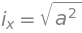

In [12]:
Eq(section_radius, sqrt(section_inertion / section_area)).subs([(section_inertion, section_inertion_formula),
                                                                (section_area, section_area_formula)])

<b>2 ХАРАКТЕРИСТИКИ СТЕРЖНЯ</b>

<b>2.1 Гибкость стержня</b>

In [13]:
rod_flexibility_equation = Eq(rod_flexibility, (rod_length_coefficient * rod_length) / section_radius)
rod_flexibility_equation

In [14]:
rod_flexibility_equation.subs(section_radius, shelf_half_distance)

In [15]:
rod_flexibility_formula = (rod_length_coefficient * rod_length) / shelf_half_distance

<b>2.2 Условная гибкость стержня</b>

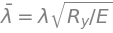

In [16]:
rod_conditional_flexibility_equation = Eq(rod_conditional_flexibility,
                                          rod_flexibility * sqrt(design_resistance / elastic_modulus))
rod_conditional_flexibility_equation

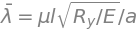

In [17]:
rod_conditional_flexibility_equation.subs(rod_flexibility, rod_flexibility_formula)

In [18]:
effective_length = rod_length_coefficient * rod_length
material_relation = sqrt(design_resistance / elastic_modulus)
rod_conditional_flexibility_formula = (effective_length * material_relation) / shelf_half_distance

<b>2.3 Коэффициент продольного изгиба</b>

In [19]:
phi_table_value = [1000, 986, 967, 948, 927, 905, 881, 855, 826, 794, 760, 723, 683, 643, 602, 562, 524,
                   487, 453, 422, 392, 359, 330, 304, 281, 261, 242, 226, 211, 198, 186, 174, 164, 155, 147,
                   139, 132, 125, 119, 105, 94, 84, 76]
phi_table_key = [round(i * 0.1, 1) for i in range(4, 80, 2)] + [round(i * 0.1, 1) for i in range(80, 105, 5)]
phi_table = list(zip(phi_table_key, phi_table_value))

def get_phi_coefficient (lam):
# возвращает значение коэффициента продольного изгиба по условной гибкости conditional_lam
    k = -2
    for i in phi_table:
        k += 1
        if lam < 0.4:
            return 0
        elif lam == i[0]:
            return i[1] * 0.001
        elif lam < i[0]:
            j = phi_table[k]
            return ((lam - j[0]) * ((i[1] - j[1]) / (i[0] - j[0])) + j[1]) * 0.001
    return 0

for i in range(0, len(phi_table)):
    print(phi_table[i])

(0.4, 1000)
(0.6, 986)
(0.8, 967)
(1.0, 948)
(1.2, 927)
(1.4, 905)
(1.6, 881)
(1.8, 855)
(2.0, 826)
(2.2, 794)
(2.4, 760)
(2.6, 723)
(2.8, 683)
(3.0, 643)
(3.2, 602)
(3.4, 562)
(3.6, 524)
(3.8, 487)
(4.0, 453)
(4.2, 422)
(4.4, 392)
(4.6, 359)
(4.8, 330)
(5.0, 304)
(5.2, 281)
(5.4, 261)
(5.6, 242)
(5.8, 226)
(6.0, 211)
(6.2, 198)
(6.4, 186)
(6.6, 174)
(6.8, 164)
(7.0, 155)
(7.2, 147)
(7.4, 139)
(7.6, 132)
(7.8, 125)
(8.0, 119)
(8.5, 105)
(9.0, 94)
(9.5, 84)
(10.0, 76)


<b>3 НАПРЯЖЕНИЯ В СТЕРЖНЕ</b>

<b>3.1 Условие прочности</b>

In [20]:
strength_condition = Eq(tension, force / section_area)
strength_condition

In [21]:
strength_condition.subs(section_area, section_area_formula)

In [22]:
strength_tension_formula = force / (2 * shelf_width * shelf_height)

<b>3.2 Условие устойчивости</b>

In [23]:
stability_condition = Eq(tension, force / (phi_coefficient * section_area))
stability_condition

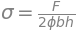

In [24]:
stability_condition.subs(section_area, section_area_formula)

In [25]:
stability_tension_formula = force / (phi_coefficient * 2 * shelf_width * shelf_height)

<b>ВЫЧИСЛЕНИЯ</b>

In [26]:
class CentralCompression:
    def __init__ (self):
        self.rod = RodValue()
        self.resistance = section_parameters[design_resistance]
        self.strength_tension = strength_tension_formula.evalf(subs = section_parameters)
        self.stability_tension = self.strength_tension / self.rod.phi_coefficient
        self.strength_use = self.strength_tension / self.resistance
        self.stability_use = self.stability_tension / self.resistance
    def print_out (self):
        self.rod.print_out()
        print()
        print("Напряжение по условию прочности: {0:.2f} Н/мм2".format(self.strength_tension))
        print("Напряжение по условию устойчивости: {0:.2f} Н/мм2".format(self.stability_tension))
        print("Расчетное сопротивление материала: {0:.2f} Н/мм2".format(self.resistance))
        print()
        print("Коэффициент использования по условию прочности: {0:.3f}".format(self.strength_use))
        print("Коэффициент использования по условию устойчивости: {0:.3f}".format(self.stability_use))

class RodValue:
    def __init__ (self):
        self.section = SectionValue()
        self.flexibility = rod_flexibility_formula.evalf(subs = section_parameters)
        self.conditional_flexibility = rod_conditional_flexibility_formula.evalf(subs = section_parameters)
        self.phi_coefficient = get_phi_coefficient(self.conditional_flexibility)
    def print_out (self):
        self.section.print_out()
        print()
        print("Гибкость стержня: {0:.2f}".format(self.flexibility))
        print("Условная гибкость стержня: {0:.2f}".format(self.conditional_flexibility))
        print("Коэффициент продольного изгиба: {0:.3f}".format(self.phi_coefficient))

class SectionValue:
    def __init__ (self):
        self.section_area = section_area_formula.evalf(subs = section_parameters)
        self.inertion = section_inertion_formula.evalf(subs = section_parameters)
        self.radius = section_parameters[shelf_half_distance]
    def print_out (self):
        print("Площадь сечения: {0:.2f} см2".format(self.section_area * AREA_UNIT_CONVERSION))
        print("Момент инерции сечения: {0:.2f} см4".format(self.inertion * INERTION_UNIT_CONVERSION))
        print("Радиус инерции сечения: {0:.2f} см".format(self.radius * LINE_UNIT_CONVERSION))

In [27]:
central_compression = CentralCompression()
central_compression.print_out()

Площадь сечения: 27.00 см2
Момент инерции сечения: 2310.19 см4
Радиус инерции сечения: 9.25 см

Гибкость стержня: 97.30
Условная гибкость стержня: 3.32
Коэффициент продольного изгиба: 0.578

Напряжение по условию прочности: 129.63 Н/мм2
Напряжение по условию устойчивости: 224.35 Н/мм2
Расчетное сопротивление материала: 240.00 Н/мм2

Коэффициент использования по условию прочности: 0.540
Коэффициент использования по условию устойчивости: 0.935
